# Example: Load results of Ashes time domain simulations 

This notebook provides an example of how the output .txt files of Ashes are loaded with the Sep005-Ashes-IO package. Furthermore, operational parameters and bending moments are plotted for different wind speeds.

*LAST MODIFICATION*: **18/12/2024**

In [22]:
# external packages
import pandas as pd
import os 
import matplotlib.pyplot as plt

# package to load ashes files
from sep005_io_ashes import ReadAshes

## 1. Load Ashes output

In [ ]:
# Define output directory
directory = 'IEA15MW_example'

# Define empty DataFrames for mean and standard deviation
df_mean = pd.DataFrame()
df_std = pd.DataFrame()

# Go through output directory and load outputs for each load case
for root, dirs, files in os.walk(directory):
    if 'Time simulation' in root:
        # Define filepaths for sensors in directory
        filepaths = {}
        i=0
        for filename in os.listdir(root):
            f = os.path.join(root, filename)
            if f.endswith('txt'):
                filepaths[i] = f
                i = i+1

        # Load ashes output as pandas DataFrame
        ashes_output = ReadAshes(filepaths=filepaths, statistic_start_time=100)
        df_ashes = ashes_output.to_pandas()
        
        # Compute mean and standard deviation of parameters for each wind speed
        df_mean['%i'  % round(df_ashes['Wind speed at hub, magnitude [ m/s ] rotor'].mean())] = df_ashes.mean() 
        df_std['%i'  % round(df_ashes['Wind speed at hub, magnitude [ m/s ] rotor'].mean())] = df_ashes.std()  

c:\Users\Tim Reinhardt\anaconda3\envs\Ashes\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
df_mean = df_mean.T
df_mean.index = df_mean.index.astype(int)
df_mean.sort_index(inplace=True)

df_std = df_std.T
df_std.index = df_std.index.astype(int)
df_std.sort_index(inplace=True)

df_std1 = df_mean + df_std
df_std1.sort_index(inplace=True)

df_std2 = df_mean - df_std
df_std2.sort_index(inplace=True)


In [17]:
df_mean

,Time [s],Axial force [ k N ] Element MP1 Monopile,Shear force (1st prin. axis) [ k N ] Element MP1 Monopile,Shear force (2nd prin. axis) [ k N ] Element MP1 Monopile,"Shear force, mag. [ k N ] Element MP1 Monopile",Torque [ k Nm ] Element MP1 Monopile,"Moment (1st prin. axis), i [ k Nm ] Element MP1 Monopile","Moment (2nd prin. axis), i [ k Nm ] Element MP1 Monopile","Moment, mag., i [ k Nm ] Element MP1 Monopile","Moment (1st prin. axis), j [ k Nm ] Element MP1 Monopile","Moment (2nd prin. axis), j [ k Nm ] Element MP1 Monopile","Moment, mag., j [ k Nm ] Element MP1 Monopile",Total force (i) .x [ k N ] Element MP1 Monopile,Total force (i) .y [ k N ] Element MP1 Monopile,Total force (i) .z [ k N ] Element MP1 Monopile,Max normal stress [ M Pa ] Element MP1 Monopile,Twist (structural) [ ° ] Element MP1 Monopile,Twist (structural) - rad [ rad ] Element MP1 Monopile,Deformed length [ m ] Element MP1 Monopile,Elongation [ ] Element MP1 Monopile,Strain energy [ J ] Element MP1 Monopile,Kinetic energy [ J ] Element MP1 Monopile,Mechanical energy [ J ] Element MP1 Monopile,Deformational rotation (i) [ ° ] Element MP1 Monopile,Deformational rotation (j) [ ° ] Element MP1 Monopile,Deformational rotation (axial) [ ° ] Element MP1 Monopile,Deformational rotation (1st prin.) [ ° ] Element MP1 Monopile,Deformational rotation (2nd prin.) [ ° ] Element MP1 Monopile,Deformational rotation (i) - rad [ rad ] Element MP1 Monopile,Deformational rotation (j) - rad [ rad ] Element MP1 Monopile,Deformational rotation (axial) - rad [ rad ] Element MP1 Monopile,Deformational rotation (1st prin.) - rad [ rad ] Element MP1 Monopile,Deformational rotation (2nd prin.) - rad [ rad ] Element MP1 Monopile,"Damping force, i [ k N ] Element MP1 Monopile","Damping moment, i [ k Nm ] Element MP1 Monopile","Damping force, sum [ k N ] Element MP1 Monopile","Damping moment, sum [ k Nm ] Element MP1 Monopile",Axial force [ k N ] Element MP90 Monopile,Shear force (1st prin. axis) [ k N ] Element MP90 Monopile,Shear force (2nd prin. axis) [ k N ] Element MP90 Monopile,"Shear force, mag. [ k N ] Element MP90 Monopile",Torque [ k Nm ] Element MP90 Monopile,"Moment (1st prin. axis), i [ k Nm ] Element MP90 Monopile","Moment (2nd prin. axis), i [ k Nm ] Element MP90 Monopile","Moment, mag., i [ k Nm ] Element MP90 Monopile","Moment (1st prin. axis), j [ k Nm ] Element MP90 Monopile","Moment (2nd prin. axis), j [ k Nm ] Element MP90 Monopile","Moment, mag., j [ k Nm ] Element MP90 Monopile",Total force (i) .x [ k N ] Element MP90 Monopile,Total force (i) .y [ k N ] Element MP90 Monopile,Total force (i) .z [ k N ] Element MP90 Monopile,Max normal stress [ M Pa ] Element MP90 Monopile,Twist (structural) [ ° ] Element MP90 Monopile,Twist (structural) - rad [ rad ] Element MP90 Monopile,Deformed length [ m ] Element MP90 Monopile,Elongation [ ] Element MP90 Monopile,Strain energy [ J ] Element MP90 Monopile,Kinetic energy [ J ] Element MP90 Monopile,Mechanical energy [ J ] Element MP90 Monopile,Deformational rotation (i) [ ° ] Element MP90 Monopile,Deformational rotation (j) [ ° ] Element MP90 Monopile,Deformational rotation (axial) [ ° ] Element MP90 Monopile,Deformational rotation (1st prin.) [ ° ] Element MP90 Monopile,Deformational rotation (2nd prin.) [ ° ] Element MP90 Monopile,Deformational rotation (i) - rad [ rad ] Element MP90 Monopile,Deformational rotation (j) - rad [ rad ] Element MP90 Monopile,Deformational rotation (axial) - rad [ rad ] Element MP90 Monopile,Deformational rotation (1st prin.) - rad [ rad ] Element MP90 Monopile,Deformational rotation (2nd prin.) - rad [ rad ] Element MP90 Monopile,"Damping force, i [ k N ] Element MP90 Monopile","Damping moment, i [ k Nm ] Element MP90 Monopile","Damping force, sum [ k N ] Element MP90 Monopile","Damping moment, sum [ k Nm ] Element MP90 Monopile",Axial force [ k N ] Element TW1 Tubular tower,Shear force (1st prin. axis) [ k N ] Element TW1 Tubular tower,Shear force (2nd prin. axis) [ k N ] Element TW1 Tubular 

In [18]:
df_std

,Time [s],Axial force [ k N ] Element MP1 Monopile,Shear force (1st prin. axis) [ k N ] Element MP1 Monopile,Shear force (2nd prin. axis) [ k N ] Element MP1 Monopile,"Shear force, mag. [ k N ] Element MP1 Monopile",Torque [ k Nm ] Element MP1 Monopile,"Moment (1st prin. axis), i [ k Nm ] Element MP1 Monopile","Moment (2nd prin. axis), i [ k Nm ] Element MP1 Monopile","Moment, mag., i [ k Nm ] Element MP1 Monopile","Moment (1st prin. axis), j [ k Nm ] Element MP1 Monopile","Moment (2nd prin. axis), j [ k Nm ] Element MP1 Monopile","Moment, mag., j [ k Nm ] Element MP1 Monopile",Total force (i) .x [ k N ] Element MP1 Monopile,Total force (i) .y [ k N ] Element MP1 Monopile,Total force (i) .z [ k N ] Element MP1 Monopile,Max normal stress [ M Pa ] Element MP1 Monopile,Twist (structural) [ ° ] Element MP1 Monopile,Twist (structural) - rad [ rad ] Element MP1 Monopile,Deformed length [ m ] Element MP1 Monopile,Elongation [ ] Element MP1 Monopile,Strain energy [ J ] Element MP1 Monopile,Kinetic energy [ J ] Element MP1 Monopile,Mechanical energy [ J ] Element MP1 Monopile,Deformational rotation (i) [ ° ] Element MP1 Monopile,Deformational rotation (j) [ ° ] Element MP1 Monopile,Deformational rotation (axial) [ ° ] Element MP1 Monopile,Deformational rotation (1st prin.) [ ° ] Element MP1 Monopile,Deformational rotation (2nd prin.) [ ° ] Element MP1 Monopile,Deformational rotation (i) - rad [ rad ] Element MP1 Monopile,Deformational rotation (j) - rad [ rad ] Element MP1 Monopile,Deformational rotation (axial) - rad [ rad ] Element MP1 Monopile,Deformational rotation (1st prin.) - rad [ rad ] Element MP1 Monopile,Deformational rotation (2nd prin.) - rad [ rad ] Element MP1 Monopile,"Damping force, i [ k N ] Element MP1 Monopile","Damping moment, i [ k Nm ] Element MP1 Monopile","Damping force, sum [ k N ] Element MP1 Monopile","Damping moment, sum [ k Nm ] Element MP1 Monopile",Axial force [ k N ] Element MP90 Monopile,Shear force (1st prin. axis) [ k N ] Element MP90 Monopile,Shear force (2nd prin. axis) [ k N ] Element MP90 Monopile,"Shear force, mag. [ k N ] Element MP90 Monopile",Torque [ k Nm ] Element MP90 Monopile,"Moment (1st prin. axis), i [ k Nm ] Element MP90 Monopile","Moment (2nd prin. axis), i [ k Nm ] Element MP90 Monopile","Moment, mag., i [ k Nm ] Element MP90 Monopile","Moment (1st prin. axis), j [ k Nm ] Element MP90 Monopile","Moment (2nd prin. axis), j [ k Nm ] Element MP90 Monopile","Moment, mag., j [ k Nm ] Element MP90 Monopile",Total force (i) .x [ k N ] Element MP90 Monopile,Total force (i) .y [ k N ] Element MP90 Monopile,Total force (i) .z [ k N ] Element MP90 Monopile,Max normal stress [ M Pa ] Element MP90 Monopile,Twist (structural) [ ° ] Element MP90 Monopile,Twist (structural) - rad [ rad ] Element MP90 Monopile,Deformed length [ m ] Element MP90 Monopile,Elongation [ ] Element MP90 Monopile,Strain energy [ J ] Element MP90 Monopile,Kinetic energy [ J ] Element MP90 Monopile,Mechanical energy [ J ] Element MP90 Monopile,Deformational rotation (i) [ ° ] Element MP90 Monopile,Deformational rotation (j) [ ° ] Element MP90 Monopile,Deformational rotation (axial) [ ° ] Element MP90 Monopile,Deformational rotation (1st prin.) [ ° ] Element MP90 Monopile,Deformational rotation (2nd prin.) [ ° ] Element MP90 Monopile,Deformational rotation (i) - rad [ rad ] Element MP90 Monopile,Deformational rotation (j) - rad [ rad ] Element MP90 Monopile,Deformational rotation (axial) - rad [ rad ] Element MP90 Monopile,Deformational rotation (1st prin.) - rad [ rad ] Element MP90 Monopile,Deformational rotation (2nd prin.) - rad [ rad ] Element MP90 Monopile,"Damping force, i [ k N ] Element MP90 Monopile","Damping moment, i [ k Nm ] Element MP90 Monopile","Damping force, sum [ k N ] Element MP90 Monopile","Damping moment, sum [ k Nm ] Element MP90 Monopile",Axial force [ k N ] Element TW1 Tubular tower,Shear force (1st prin. axis) [ k N ] Element TW1 Tubular tower,Shear force (2nd prin. axis) [ k N ] Element TW1 Tubular 

## 3. Plots

### 3.1 Operational parameters

Text(0.5, 1.0, 'Pitch angle')

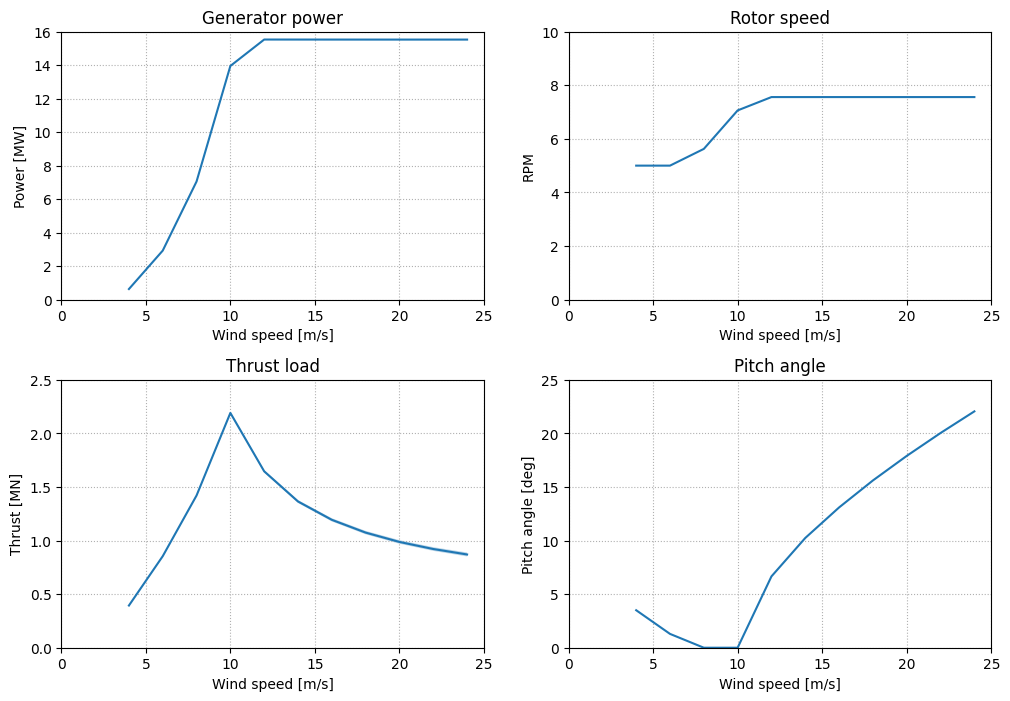

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[12, 8])
fig.subplots_adjust(hspace=0.3)
ax1.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_mean['Power (electrical) [ k W ] generator']/1000, label='Generator Power')
ax1.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['Power (electrical) [ k W ] generator']/1000, df_std2['Power (electrical) [ k W ] generator']/1000, alpha=0.3, ls='')
ax1.set_xlim([0, 25])
ax1.set_ylim([0, 16])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Power [MW]')
ax1.grid(which='both', linestyle=':')
ax1.set_title('Generator power')

ax2.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_mean['RPM [ rpm ] rotor'])
ax2.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['RPM [ rpm ] rotor'], df_std2['RPM [ rpm ] rotor'], alpha=0.3, ls='')
ax2.set_xlim([0, 25])
ax2.set_ylim([0, 10])
ax2.set_xlabel('Wind speed [m/s]')
ax2.set_ylabel('RPM')
ax2.grid(which='both', linestyle=':')
ax2.set_title('Rotor speed')

ax3.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'],df_mean['Thrust (aero) [ k N ] rotor']/1000)
ax3.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['Thrust (aero) [ k N ] rotor']/1000, df_std2['Thrust (aero) [ k N ] rotor']/1000, alpha=0.3, ls='')
ax3.set_xlim([0, 25])
ax3.set_ylim([0, 2.5])
ax3.set_xlabel('Wind speed [m/s]')
ax3.set_ylabel('Thrust [MN]')
ax3.grid(which='both', linestyle=':')
ax3.set_title('Thrust load')

ax4.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_mean['Pitch angle [ ° ] Blade 1'])
ax4.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['Pitch angle [ ° ] Blade 1'], df_std2['Pitch angle [ ° ] Blade 1'], alpha=0.3, ls='')
ax4.set_xlim([0, 25])
ax4.set_ylim([0, 25])
ax4.set_xlabel('Wind speed [m/s]')
ax4.set_ylabel('Pitch angle [deg]')
ax4.grid(which='both', linestyle=':')
ax4.set_title('Pitch angle')

### 3.2 Bending moments

#### Tower

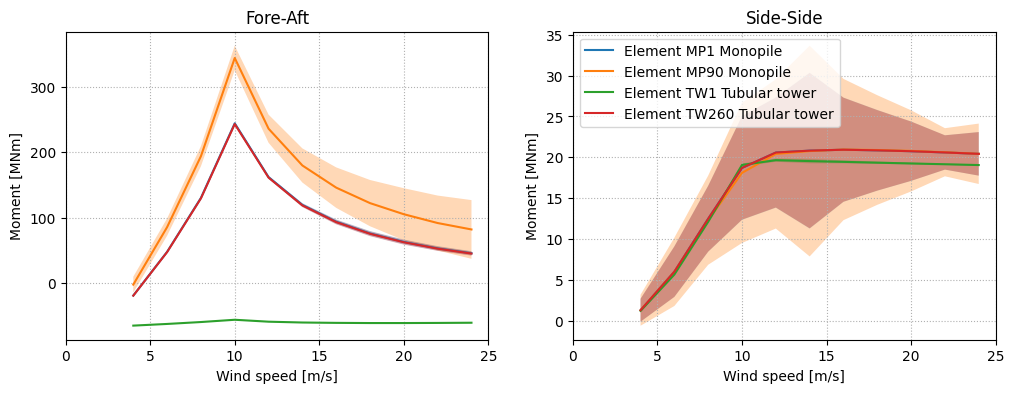

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12, 4], sharex=True)

for col in df_mean.columns: 
    if 'Moment (1st prin. axis), j [ k Nm ] Element' in col:
        ax1.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'],df_mean[col]/1000, label=col[36:])
        ax1.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1[col]/1000, df_std2[col]/1000, alpha=0.3, ls='')
    elif 'Moment (2nd prin. axis), j [ k Nm ] Element' in col:    
        ax2.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'],df_mean[col]/1000, label=col[36:])
        ax2.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1[col]/1000, df_std2[col]/1000, alpha=0.3, ls='')


ax1.set_xlim([0, 25])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Moment [MNm]')
ax1.grid(which='both', linestyle=':')
ax1.set_title('Fore-Aft')

ax2.set_xlim([0, 25])
ax2.set_xlabel('Wind speed [m/s]')
ax2.set_ylabel('Moment [MNm]')
ax2.grid(which='both', linestyle=':')
ax2.set_title('Side-Side')
ax2.legend(loc='upper left')

#### Blade root

Text(0.5, 1.0, 'Edgewise')

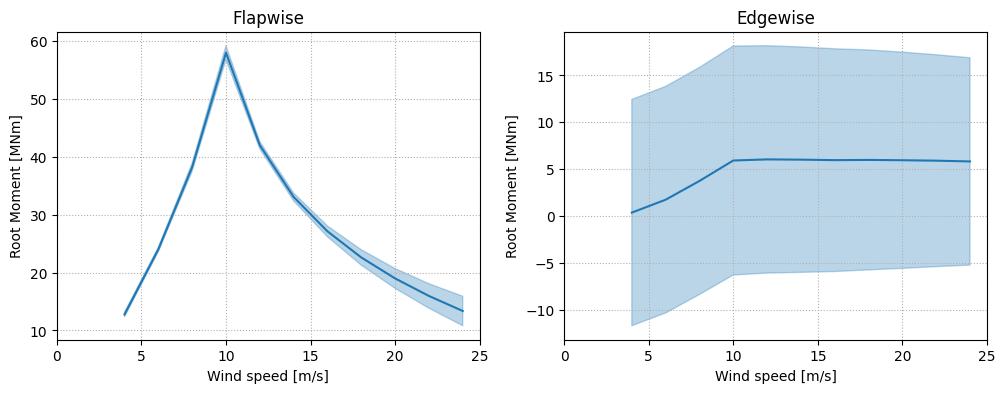

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12, 4], sharex=True)

ax1.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'],df_mean['Root moment (out-of-plane) [ k Nm ] Blade 1']/1000, color='tab:blue')
ax1.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['Root moment (out-of-plane) [ k Nm ] Blade 1']/1000, df_std2['Root moment (out-of-plane) [ k Nm ] Blade 1']/1000, color='tab:blue', alpha=0.3, ls='')
ax1.set_xlim([0, 25])
#ax1.set_ylim([-100000, 250000])
ax1.set_xlabel('Wind speed [m/s]')
ax1.set_ylabel('Root Moment [MNm]')
ax1.grid(which='both', linestyle=':')
ax1.set_title('Flapwise')
#ax1.legend()

ax2.plot(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'],df_mean['Root moment (in-plane) [ k Nm ] Blade 1']/1000)
ax2.fill_between(df_mean['Wind speed at hub, magnitude [ m/s ] rotor'], df_std1['Root moment (in-plane) [ k Nm ] Blade 1']/1000, df_std2['Root moment (in-plane) [ k Nm ] Blade 1']/1000, color='tab:blue', alpha=0.3, ls='')
ax2.set_xlim([0, 25])
#ax2.set_ylim([0, 22000])
ax2.set_xlabel('Wind speed [m/s]')
ax2.set_ylabel('Root Moment [MNm]')
ax2.grid(which='both', linestyle=':')
ax2.set_title('Edgewise')